### **Tarea Semana 16: Algoritmos genéticos**
#### IF4702 - Física Computacional I 
#### Grupo 1, primer semestre 2022 

> María Fernanda Quesada Mena (carné: 2020036474)


In [2]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import random 

#### **1. Algortimo genético estándar**



In [1]:
def InicializarPoblación(tamañoPoblación, nCiudades):
    # Crear un arreglo para almacenar la población
    población = np.random.randint(2, size = [tamañoPoblación, nCiudades])
    return población

In [2]:
def CodificaciónCromosomas(población, nCiudades):
    # Se asigna una permutación de las ciudades a cada trayectoria de la población
    for i in range(len(población)):
      población[i] = np.random.permutation(nCiudades)

    return población

In [5]:
def CálculoValoresAjuste(tamañoPoblación, población, coordenadas): 
    # Inicializar un arreglo que guarde el valor de ajuste de cada trayectoria
    valoresAjuste =  np.zeros([tamañoPoblación, 1])

    for k in range(len(valoresAjuste)):
        distanciaTrayectoria = 0
        for m in range(len(población[k])-1):
            distanciaTrayectoria += np.sqrt((coordenadas[población[k][m+1]][0]-
            coordenadas[población[k][m]][0])**2 + 
            (coordenadas[población[k][m+1]][1] - 
             coordenadas[población[k][m]][1])**2)
        valoresAjuste[k] = distanciaTrayectoria**(-1)

    return valoresAjuste

In [6]:
def OperadorMutación(población, p_mut):
  for g in range(len(población)):
    # Seleccionar 2 genes del cromosoma
    ciudad1 = int(np.random.uniform(0,len(población[g])))
    ciudad2 = int(np.random.uniform(0,len(población[g])))
    # Guardar en una variable el gen a cambiar
    valorCambio = población[g][ciudad1]
    # Verificar si se cumple el criterio de la probabilidad de mutación para
    # ver si se realiza el cambio
    if np.random.random() < p_mut:
      población[g][ciudad1] = población[g][ciudad2]
      población[g][ciudad2] = valorCambio

    return población

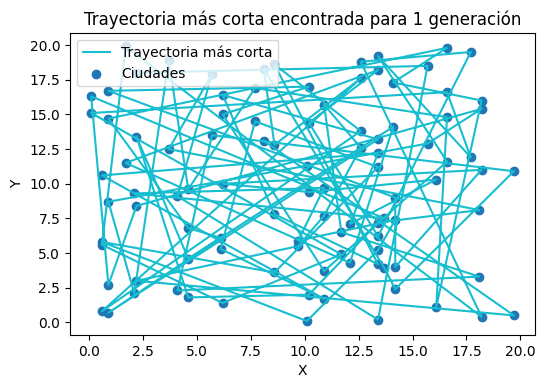

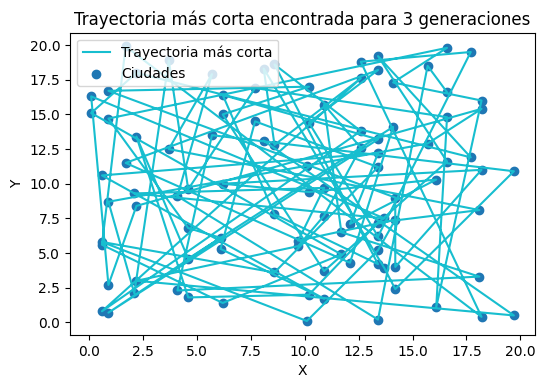

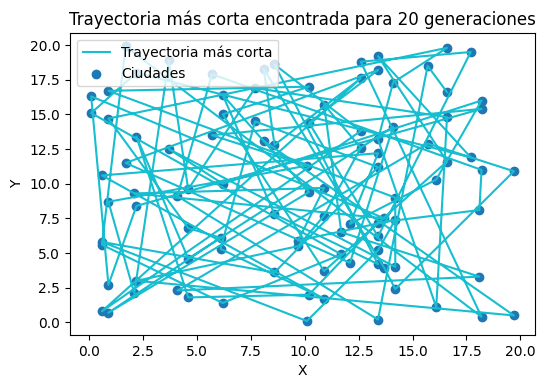

In [ ]:
# Parámetros iniciales
tamañoPoblación = 5
nCiudades = 100
p_mut = 0.25
nGeneraciones = 20

# Inicializar un arreglo para las coordenadas xy de cada ciudad
coordenadas = np.zeros([nCiudades, 2])

# Calcular las coordenadas de cada ciudad y guardarlas en el arreglo
for j in range(len(coordenadas)):
    coordenadas[j][0] = 0.1*((9+13*j**2)%200)
    coordenadas[j][1] = 0.1*((7+1327*j)%200)

# Inicialización de la población
población = InicializarPoblación(tamañoPoblación, nCiudades)

# Codificación de los cromosomas 
población = CodificaciónCromosomas(población, nCiudades)

# Crear dos arreglos, uno para almacenar el promedio de los valores de 
# ajuste y otro para guardar el mejor valor de ajuste de cada generación.
promedioValoresAjuste = np.zeros([nGeneraciones, 1])
mejoresValoresAjuste = np.zeros([nGeneraciones, 1])

# Ciclo principal, este termina una vez que el número de iteraciones alcanza 
# el número de generaciones 
for iGen in range(nGeneraciones):
    mejoresValoresAjusteInicial = np.copy(mejoresValoresAjuste)

    # Cálculo de los valores de ajuste de la población
    valoresAjuste = CálculoValoresAjuste(tamañoPoblación, población, coordenadas)

    # Almacenar tanto el promedio de los valores de ajuste como el mejor 
    promedioValoresAjuste[iGen] = np.mean(valoresAjuste)
    mejoresValoresAjuste[iGen] = np.max(valoresAjuste)
    mejorIndividuo = población[np.where(valoresAjuste == np.max(valoresAjuste))[0][0]]

    # Crear un arreglo para almacenar a la población nueva
    poblaciónNueva = np.copy(población)

    # Aplicar el operador mutación a la población nueva
    poblaciónNueva = OperadorMutación(poblaciónNueva, p_mut)

    # Para que el ciclo vuelva a comenzar se define que ahora la población con
    # la que se comienza a trabajar es la población nueva que pasó por la
    # mutación
    población = np.copy(poblaciónNueva)

    
    # Gráfico de la trayectoria más corta de la simulación

    # Arreglo de coordenadas de la trayectoria más corta
    coordenadasMejorCamino = []
    for ciudad in range(len(mejorIndividuo)): 
        coordenadasMejorCamino.append(coordenadas[mejorIndividuo[ciudad]])
    coordenadasMejorCamino = np.array(coordenadasMejorCamino)
    
    # Gráfico para la primera generación
    if iGen == 0:
        fig, ax = plt.subplots(1, 1, dpi=100)
        ax.scatter(coordenadas[:,0],coordenadas[:,1], c="C0", label="Ciudades")
        ax.plot(coordenadasMejorCamino[:,0],coordenadasMejorCamino[:,1], c="C9" ,label="Trayectoria más corta")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Trayectoria más corta encontrada para "+str(iGen+1)+" generación")
        plt.legend(loc="upper left")
        plt.show()

    # Si en una generación se obtiene un mejor valor de ajuste que el que se ha 
    # estado obteniendo se vuelve a graficar el camino más corto
    elif mejoresValoresAjuste[iGen] > np.max(mejoresValoresAjusteInicial):
        fig, ax = plt.subplots(1, 1, dpi=100)
        ax.scatter(coordenadas[:,0],coordenadas[:,1], c="C0", label="Ciudades")
        ax.plot(coordenadasMejorCamino[:,0],coordenadasMejorCamino[:,1], c="C9" ,label="Trayectoria más corta")
        plt.title("Trayectoria más corta encontrada para "+str(iGen+1)+" generaciones")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend(loc="upper left")
        plt.show()

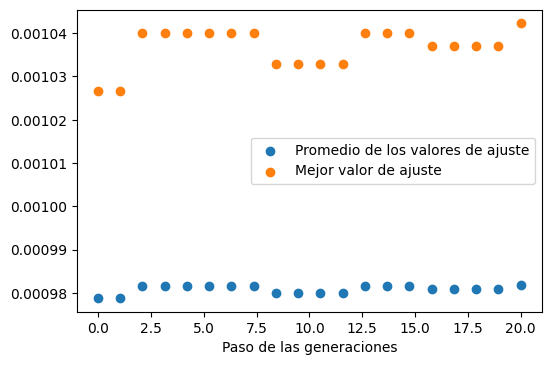

In [ ]:
# Gráfico de valores de ajuste promedio y mejor adaptado
fig, ax = plt.subplots(1, 1, dpi=100)
generaciones = np.linspace(0,nGeneraciones,nGeneraciones)
ax.scatter(generaciones,promedioValoresAjuste)
ax.scatter(generaciones,mejoresValoresAjuste)
plt.legend(["Promedio de los valores de ajuste", "Mejor valor de ajuste"], loc ="center right")
plt.xlabel("Paso de las generaciones")
plt.show()

#### **1. Algortimo genético modificado**

In [10]:
def EncontrarCoordenadaMásCercana(nCiudades, ciudad, coordenadas, ciudadesVisitadas):

    # Crear un arreglo en el que se almacenen las distancias a cada ciudad
    distancias = np.zeros([nCiudades, 1])

    # Calcular la distancia entre la ciudad seleccionada y cada una de las
    # posibles ciudades a las que puede ir después
    for j in range(nCiudades):
      distancias[j] = np.sqrt((coordenadas[j][0]-coordenadas[ciudad][0])**2
                              +(coordenadas[j][1]-coordenadas[ciudad][1])**2)
      
    # Guardar el arreglo de distancias ordenado en una variable
    distanciasOrdenadas = np.sort(distancias, axis = 0)

    # La distancia mínima que se busca debe ser diferente de cero y asegurarse
    # de que se escoja a una ciudad diferente de la que viene
    distanciaMenor = distanciasOrdenadas[1]
    m = 1
    while any(ciudadesVisitadas == np.where(distancias == distanciaMenor)[0][0]):
        distanciaMenor = distanciasOrdenadas[1+m]
        m += 1

    # Buscar el índice correspondiente a la ciudad más cercana 
    ciudadMásCercana = np.where(distancias == distanciaMenor)[0][0]

    return ciudadMásCercana

In [11]:
def InicializarPoblaciónAGM(tamañoPoblación, nCiudades, coordenadas):

    # Inicializar un arreglo en el que se almacene la población
    población = np.random.randint(2, size = [tamañoPoblación, nCiudades])

    for i in range(len(población)):

      # Seleccionar una ciudad aleatoriamente para que sea el punto de partida
      ciudad = int(np.random.uniform(0,nCiudades)) 
      # Definir la ciudad seleccionada como el punto de partida
      población[i][0] = ciudad

      # Definir que la siguiente ciudad por visitar es la más cercana
      for k in range(1,len(población[i])):
        población[i][k] = EncontrarCoordenadaMásCercana(nCiudades, población[i][k-1], coordenadas,población[i][:k-1])

    return población

In [17]:
def OperadorMutaciónAGM(población, tamañoPoblación):
  # Seleccionar aleatoriamente la cantidad de trayectorias a mutar
  cantidadMutaciones = int(np.random.uniform(3,11))

  for n in range(0, cantidadMutaciones):
    # Seleccionar aleatoriamente la trayectoria a mutar
    trayectoriaAMutar = int(np.random.uniform(1,tamañoPoblación))

    # Seleccionar 2 genes del cromosoma
    ciudad1 = int(np.random.uniform(0,len(población[trayectoriaAMutar])))
    ciudad2 = int(np.random.uniform(0,len(población[trayectoriaAMutar])))

    # Guardar en una variable el gen a cambiar
    valorCambio = población[trayectoriaAMutar][ciudad1]
    # Realizar la mutación
    población[trayectoriaAMutar][ciudad1] = población[trayectoriaAMutar][ciudad2]
    población[trayectoriaAMutar][ciudad2] = valorCambio

    return población

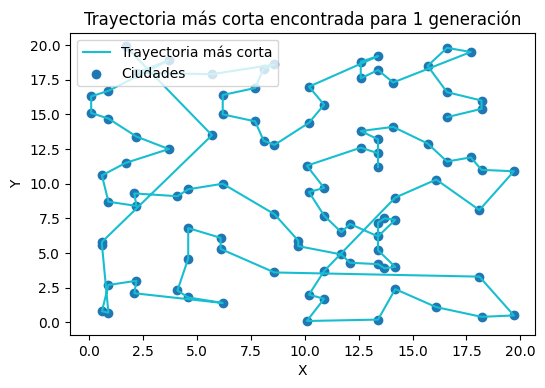

In [38]:
# Parámetros iniciales
tamañoPoblación = 5
nCiudades = 100
nGeneraciones = 20

# Inicializar un arreglo para las coordenadas xy de cada ciudad
coordenadas = np.zeros([nCiudades, 2])

# Calcular las coordenadas de cada ciudad y guardarlas en el arreglo
for j in range(len(coordenadas)):
    coordenadas[j][0] = 0.1*((9+13*j**2)%200)
    coordenadas[j][1] = 0.1*((7+1327*j)%200)

# Inicialización de la población
población = InicializarPoblaciónAGM(tamañoPoblación, nCiudades, coordenadas)

# Crear dos arreglos, uno para almacenar el promedio de los valores de 
# ajuste y otro para guardar el mejor valor de ajuste de cada generación.
promedioValoresAjuste = np.zeros([nGeneraciones, 1])
mejoresValoresAjuste = np.zeros([nGeneraciones, 1])

# Ciclo principal, este termina una vez que el número de iteraciones alcanza 
# el número de generaciones 
for iGen in range(nGeneraciones):
    mejoresValoresAjusteInicial = np.copy(mejoresValoresAjuste)

    # Cálculo de los valores de ajuste de la población
    valoresAjuste = CálculoValoresAjuste(tamañoPoblación, población, coordenadas)

    # Almacenar tanto el promedio de los valores de ajuste como el mejor 
    promedioValoresAjuste[iGen] = np.mean(valoresAjuste)
    mejoresValoresAjuste[iGen] = np.max(valoresAjuste)
    mejorIndividuo = población[np.where(valoresAjuste == np.max(valoresAjuste))[0][0]]

    # Crear un arreglo para almacenar a la población nueva
    poblaciónNueva = np.copy(población)

    # Aplicar el operador mutación a la población nueva
    poblaciónNueva = OperadorMutaciónAGM(poblaciónNueva, tamañoPoblación)

    # Para que el ciclo vuelva a comenzar se define que ahora la población con
    # la que se comienza a trabajar es la población nueva que pasó por la
    # mutación
    población = np.copy(poblaciónNueva)

    
    # Gráfico de la trayectoria más corta de la simulación

    # Arreglo de coordenadas de la trayectoria más corta
    coordenadasMejorCamino = []
    for ciudad in range(len(mejorIndividuo)): 
        coordenadasMejorCamino.append(coordenadas[mejorIndividuo[ciudad]])
    coordenadasMejorCamino = np.array(coordenadasMejorCamino)
    
    # Gráfico para la primera generación
    if iGen == 0:
        fig, ax = plt.subplots(1, 1, dpi=100)
        ax.scatter(coordenadas[:,0],coordenadas[:,1], c="C0", label="Ciudades")
        ax.plot(coordenadasMejorCamino[:,0],coordenadasMejorCamino[:,1], c="C9" ,label="Trayectoria más corta")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Trayectoria más corta encontrada para "+str(iGen+1)+" generación")
        plt.legend(loc="upper left")
        plt.show()

    # Si en una generación se obtiene un mejor valor de ajuste que el que se ha 
    # estado obteniendo se vuelve a graficar el camino más corto
    elif mejoresValoresAjuste[iGen] > np.max(mejoresValoresAjusteInicial):
        fig, ax = plt.subplots(1, 1, dpi=100)
        ax.scatter(coordenadas[:,0],coordenadas[:,1], c="C0", label="Ciudades")
        ax.plot(coordenadasMejorCamino[:,0],coordenadasMejorCamino[:,1], c="C9" ,label="Trayectoria más corta")
        plt.title("Trayectoria más corta encontrada para "+str(iGen+1)+" generaciones")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend(loc="upper left")
        plt.show()

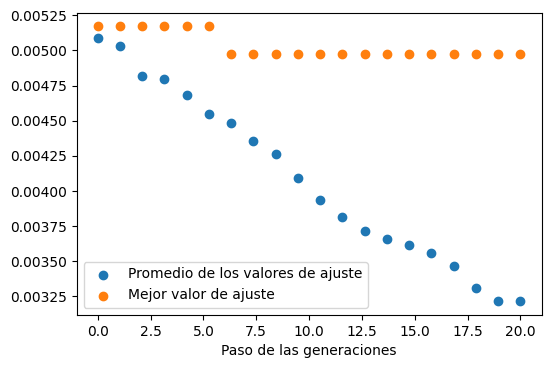

In [40]:
# Gráfico de valores de ajuste promedio y mejor adaptado
fig, ax = plt.subplots(1, 1, dpi=100)
generaciones = np.linspace(0,nGeneraciones,nGeneraciones)
ax.scatter(generaciones,promedioValoresAjuste)
ax.scatter(generaciones,mejoresValoresAjuste)
plt.legend(["Promedio de los valores de ajuste", "Mejor valor de ajuste"], loc ="lower left")
plt.xlabel("Paso de las generaciones")
plt.show()